In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading datasets

In [135]:
fitbit_daily_activity_df = pd.read_csv('../../../../data/client_data/cleaned/fitbit/cleaned_fitbit_grouped_dups.csv')
fitbit_daily_activity_df.head()

,id,sleep_target,sleep_value,steps,calories_target,calories_value,createdAt,updatedAt,intensity,min_heart_rate,max_heart_rate,user/id,user/email,user/full_name,user/disable_survey
0,13,480,403.0,8416.0,2048.0,1748.0,2023-05-08 17:56:01.406000+00:00,2023-05-09 23:56:02.232000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,480,383.0,9753.0,2048.0,1848.0,2023-05-10 00:00:03.442000+00:00,2023-05-11 23:56:04.105000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,480,462.0,273.0,2048.0,1199.0,2023-05-12 00:00:03.483000+00:00,2023-05-13 23:56:03.522000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,480,421.0,2504.0,2048.0,745.0,2023-05-14 00:00:03.142000+00:00,2023-05-15 10:28:03.909000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33,480,421.0,11681.0,2048.0,2025.0,2023-05-15 12:00:04.019000+00:00,2023-05-15 23:55:04.824000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
fitbit_daily_activity_df.head()

,id,sleep_target,sleep_value,steps,calories_target,calories_value,createdAt,updatedAt,intensity,min_heart_rate,max_heart_rate,user/id,user/email,user/full_name,user/disable_survey
0,13,480,403.0,8416.0,2048.0,1748.0,2023-05-08 17:56:01.406000+00:00,2023-05-09 23:56:02.232000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,480,383.0,9753.0,2048.0,1848.0,2023-05-10 00:00:03.442000+00:00,2023-05-11 23:56:04.105000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,480,462.0,273.0,2048.0,1199.0,2023-05-12 00:00:03.483000+00:00,2023-05-13 23:56:03.522000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,480,421.0,2504.0,2048.0,745.0,2023-05-14 00:00:03.142000+00:00,2023-05-15 10:28:03.909000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33,480,421.0,11681.0,2048.0,2025.0,2023-05-15 12:00:04.019000+00:00,2023-05-15 23:55:04.824000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
intensity_hr_df = fitbit_daily_activity_df[['min_heart_rate', 'max_heart_rate', 'intensity']]
intensity_hr_df = intensity_hr_df.dropna()
len(intensity_hr_df)

5

In [138]:
#^ note only 5 datapoints to cluster with, seriously limited sample

In [139]:
intensity_hr_df.describe()

,min_heart_rate,max_heart_rate,intensity
count,5.000000,5.000000,5.000000
mean,66.400000,135.800000,39.600000
std,7.334848,14.956604,32.160535
min,59.000000,117.000000,10.000000
25%,60.000000,126.000000,21.000000
50%,67.000000,139.000000,32.000000
75%,69.000000,141.000000,42.000000
max,77.000000,156.000000,93.000000


# Feature Scaling and Transformation

/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_65197/3523919901.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  intensity_hr_df.hist(ax=axis, bins=20)


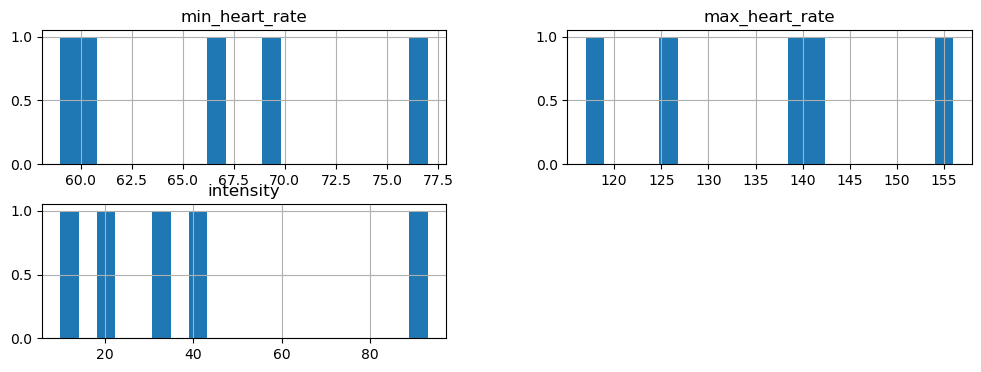

In [140]:
# inspecting the distribution of each feature:
fig, axis = plt.subplots(figsize=(12, 4))
intensity_hr_df.hist(ax=axis, bins=20)
plt.show()

In [141]:
intensity_hr_df.skew()

min_heart_rate    0.571697
max_heart_rate    0.103354
intensity         1.496616
dtype: float64

In [142]:
before_unskewed_df = intensity_hr_df.copy() #(for comparison after)

In [143]:
def box_cox_transformation(feature, l):
    transform = ColumnTransformer(transformers=[("box-cox", FunctionTransformer(lambda X: stats.boxcox(X, lmbda=l)), [feature])])
    # return pd.DataFrame(transform.fit_transform(activity_steps_df))
    return transform.fit_transform(intensity_hr_df)

In [144]:
intensity_hr_df['intensity'] = box_cox_transformation(feature="intensity", l=0.01)
intensity_hr_df['min_heart_rate'] = box_cox_transformation(feature="min_heart_rate", l=0.2)

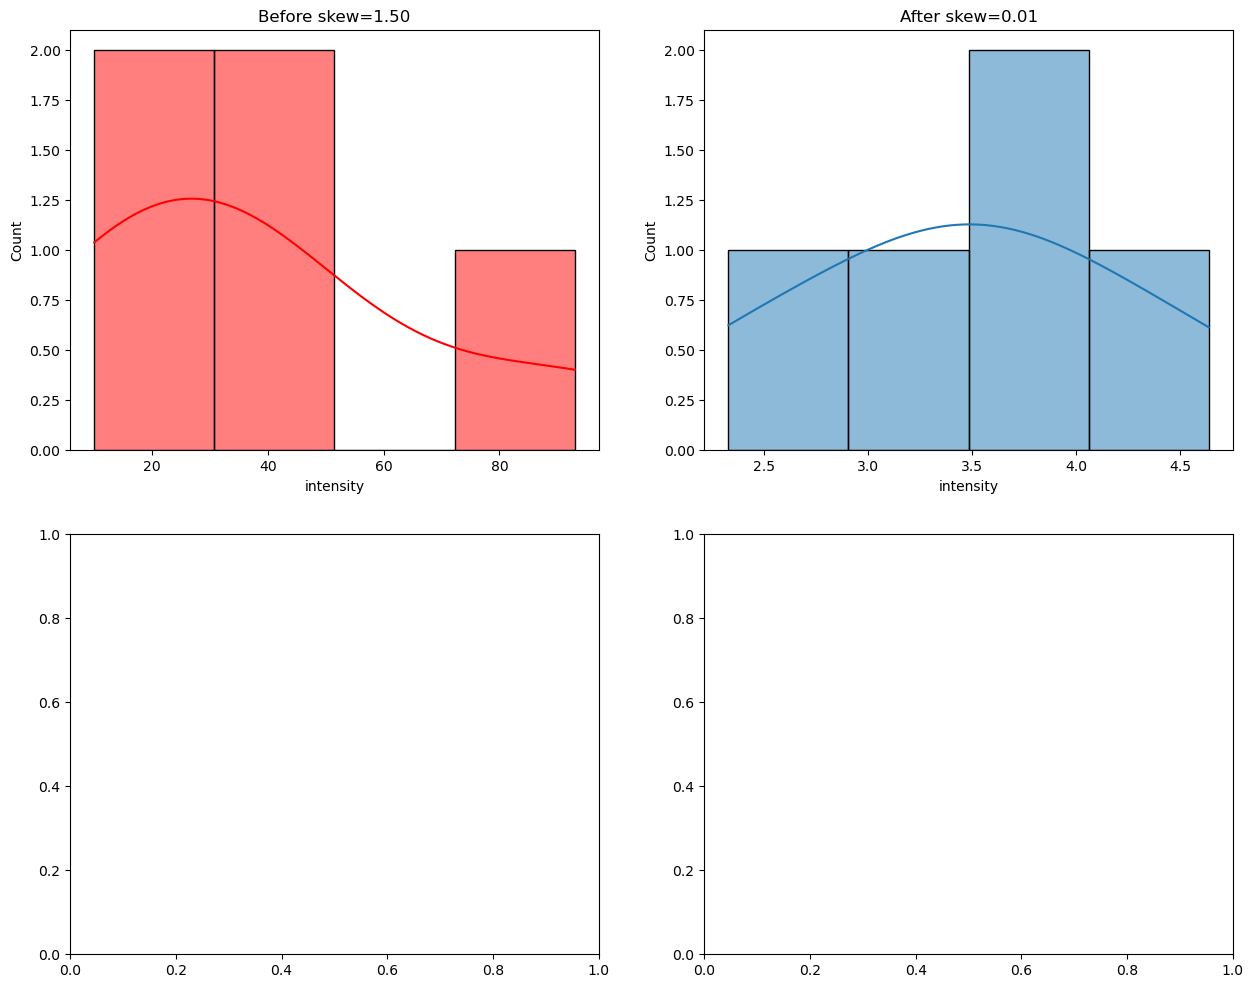

In [145]:

fig, ax = plt.subplots(2, 2, figsize=(15,12))
# activity_steps_df.hist(ax=ax, bins=20)
sns.histplot(before_unskewed_df['intensity'], kde=True, ax=ax[0,0], color='red').set(title=f"Before skew={before_unskewed_df['intensity'].skew():0.2f}")
sns.histplot(intensity_hr_df['intensity'], kde=True, ax=ax[0,1]).set(title=f"After skew={intensity_hr_df['intensity'].skew():0.2f}")

# sns.histplot(before_unskewed_df['min_heart_rate'], kde=True, ax=ax[1,0], color='red').set(title=f"Before skew={before_unskewed_df['min_heart_rate'].skew():0.2f}")
# sns.histplot(intensity_hr_df['min_heart_rate'], kde=True, ax=ax[1,1]).set(title=f"After skew={intensity_hr_df['min_heart_rate'].skew():0.2f}")

plt.show()

In [146]:
intensity_hr_df.describe()

,min_heart_rate,max_heart_rate,intensity
count,5.000000,5.000000,5.000000
mean,6.562975,135.800000,3.478485
std,0.252982,14.956604,0.854921
min,6.301612,117.000000,2.329299
25%,6.339666,126.000000,3.091342
50%,6.592710,139.000000,3.526492
75%,6.661108,141.000000,3.808399
max,6.919778,156.000000,4.636892


# Scaling the features

In [147]:
#^ since the scales are different it's worth scaling the values to be of the same scales, so steps isn't given more weight than activity minutes

In [148]:
scaler = StandardScaler()
scaled_intensity_steps = scaler.fit_transform(intensity_hr_df)
scaled_intensity_steps

array([[ 0.13141187, -0.73256825, -0.50629093],
       [ 1.57686126, -1.405335  , -1.50286188],
       [-0.98689589,  0.38870968,  0.06278251],
       [-1.15506996,  0.23920596,  0.43144936],
       [ 0.43369272,  1.50998761,  1.51492094]])

In [149]:
scaled_intensity_steps_df = pd.DataFrame(scaled_intensity_steps, columns=intensity_hr_df.columns)
scaled_intensity_steps_df

,min_heart_rate,max_heart_rate,intensity
0,0.131412,-0.732568,-0.506291
1,1.576861,-1.405335,-1.502862
2,-0.986896,0.388710,0.062783
3,-1.155070,0.239206,0.431449
4,0.433693,1.509988,1.514921


In [150]:
scaled_intensity_steps_df.describe()

,min_heart_rate,max_heart_rate,intensity
count,5.000000e+00,5.000000e+00,5.000000e+00
mean,7.660539e-16,-8.881784e-16,5.329071e-16
std,1.118034e+00,1.118034e+00,1.118034e+00
min,-1.155070e+00,-1.405335e+00,-1.502862e+00
25%,-9.868959e-01,-7.325682e-01,-5.062909e-01
50%,1.314119e-01,2.392060e-01,6.278251e-02
75%,4.336927e-01,3.887097e-01,4.314494e-01
max,1.576861e+00,1.509988e+00,1.514921e+00


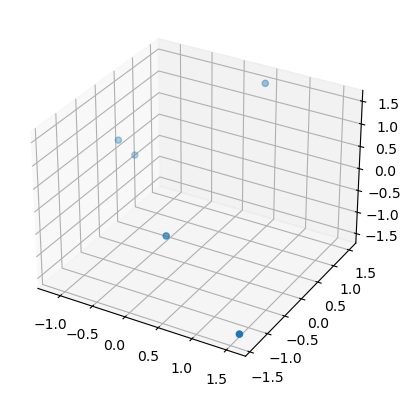

In [157]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_intensity_steps_df['min_heart_rate'], scaled_intensity_steps_df['max_heart_rate'], scaled_intensity_steps_df['intensity'])
plt.show()


In [648]:
#^^^ perhaps remove that outlier in the top left??

# K-means clustering

In [158]:

#! number of clusters?
model = KMeans(n_clusters=5, random_state=0)
kmeans_labels = model.fit_predict(scaled_intensity_steps_df.values)
# kmeans.labels_

In [159]:
kmeans_labels

array([3, 1, 2, 4, 0], dtype=int32)

In [160]:
scaled_intensity_steps_df.describe()

,min_heart_rate,max_heart_rate,intensity
count,5.000000e+00,5.000000e+00,5.000000e+00
mean,7.660539e-16,-8.881784e-16,5.329071e-16
std,1.118034e+00,1.118034e+00,1.118034e+00
min,-1.155070e+00,-1.405335e+00,-1.502862e+00
25%,-9.868959e-01,-7.325682e-01,-5.062909e-01
50%,1.314119e-01,2.392060e-01,6.278251e-02
75%,4.336927e-01,3.887097e-01,4.314494e-01
max,1.576861e+00,1.509988e+00,1.514921e+00


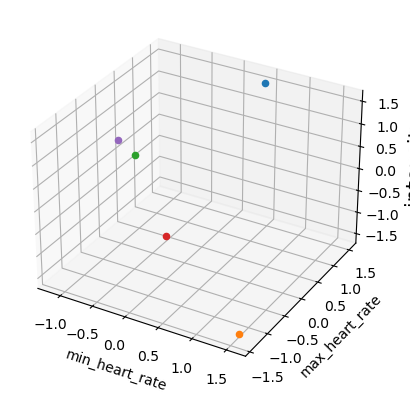

In [175]:
u_labels = np.unique(kmeans_labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(scaled_intensity_steps_df[kmeans_labels == i]['min_heart_rate'], scaled_intensity_steps_df[kmeans_labels == i]['max_heart_rate'], scaled_intensity_steps_df[kmeans_labels == i]['intensity'] , label = i)

plt.xlabel('min_heart_rate')
plt.ylabel('max_heart_rate')
ax.set_zlabel('intensity', fontsize=15, rotation=60)

plt.show()

In [176]:
scaled_intensity_steps_df.values

array([[ 0.13141187, -0.73256825, -0.50629093],
       [ 1.57686126, -1.405335  , -1.50286188],
       [-0.98689589,  0.38870968,  0.06278251],
       [-1.15506996,  0.23920596,  0.43144936],
       [ 0.43369272,  1.50998761,  1.51492094]])